# 1 Getting Started

This notebook steps through a simple example to test out Earth Data credentials that the user has setup by following the instructions outlined in [1_Getting_Started](1_Getting_Started.md)

In [1]:
# library to handle filepath operations
from pathlib import Path

# library for handling geospatial data
import rasterio
from rasterio.plot import show

# libraries to help with visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors

# handle numbers
import numpy as np

# imports for system calls
import os

In [2]:
# # this python command will copy your local .netrc file to the user home directory
# # this is where the earthdata library will look for the login credentials
_ = os.system(f"cp .netrc {Path().home()}")

In [3]:
# We set the following rasterio environment variables to read data from the cloud
rio_env = rasterio.Env(
                  GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR',
                  CPL_VSIL_CURL_ALLOWED_EXTENSIONS="TIF, TIFF",
                  GDAL_HTTP_COOKIEFILE=Path('~/cookies.txt').expanduser(),
                  GDAL_HTTP_COOKIEJAR=Path('~/cookies.txt').expanduser()
                  )
rio_env.__enter__()

To test if we have correctly set up our NASA EarthData credentials in the `.netrc` file, we will be trying to download a sample file from the EarthData portal.

In [4]:
sample_file_href = "https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/OPERA_L3_DSWX-HLS_PROVISIONAL_V1/OPERA_L3_DSWx-HLS_T11SQA_20230415T181919Z_20230417T094518Z_S2B_30_v1.0_B02_BWTR.tif"

In [5]:
try:
    with rasterio.open(sample_file_href) as ds:
        img = ds.read()
        colormap = ds.colormap(1)
        transform = ds.transform
    print("Success! Proceed to the next cell and visualize the downloaded data")
except:
    print("Something went wrong - check that your credentials file is correctly formatted and run the notebook from the beginning")

Success! Proceed to the next cell and visualize the downloaded data


In [6]:
cmap = ListedColormap([np.array(colormap[key]) / 255 for key in range(256)])

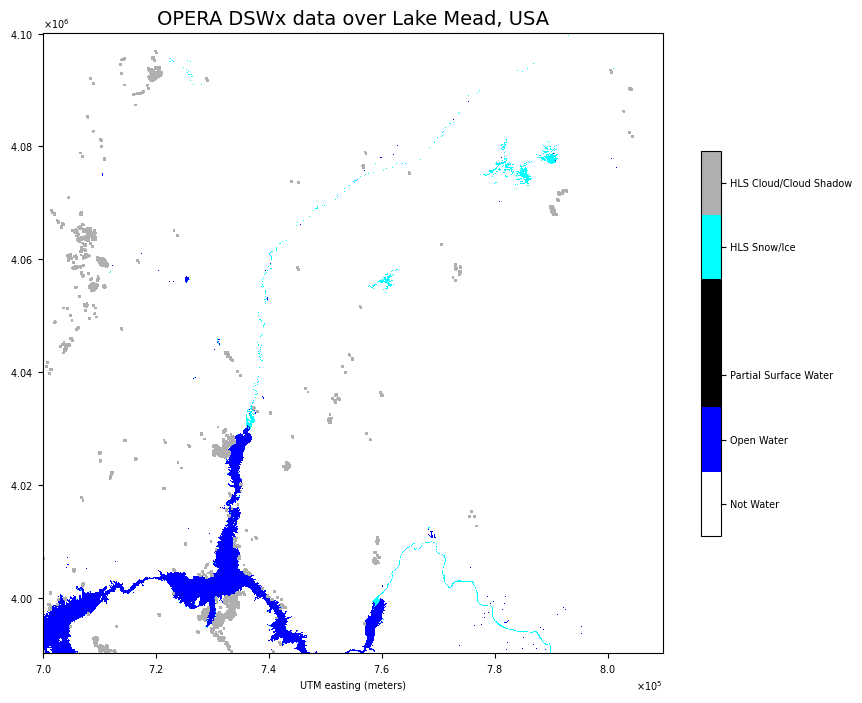

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im = show(img, transform=transform, ax=ax, interpolation='none', cmap=cmap, vmin=0, vmax=255)
ax.set_title('OPERA DSWx data over Lake Mead, USA',fontsize=14)
ax.set_xlabel('UTM easting (meters)',fontsize=7)
ax.ticklabel_format(axis='both', style='scientific',scilimits=(0,0),useOffset=False,useMathText=True)
ax.tick_params(axis='both', which='major', labelsize=7)
ax.yaxis.get_offset_text().set_fontsize(7)
ax.xaxis.get_offset_text().set_fontsize(7)

bounds =  [0, 1, 2, 3, 
           251, 252, 253,
          ]

im = im.get_images()[0]

cbar=fig.colorbar(im, 
                  ax=ax, 
                  shrink=0.5, 
                  pad=0.05, 
                  boundaries=bounds, 
                  cmap=cmap, 
                  ticks=[0.5, 1.5, 2.5, 251.5, 252.5])

cbar.ax.tick_params(labelsize=8)
norm = colors.BoundaryNorm(bounds, cmap.N)
cbar.set_ticklabels(['Not Water', 
                     'Open Water',
                     'Partial Surface Water',
                     'HLS Snow/Ice',
                     'HLS Cloud/Cloud Shadow', 
                    ],
                    fontsize=7)   